In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example 2

In [2]:
df = pd.read_csv('dataset/ex2data2.txt', header=None, names=['score1', 'score2', 'y'])

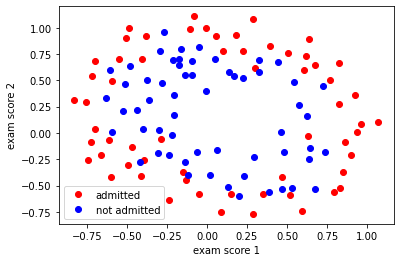

In [3]:
plt.plot(df[df['y']==0]['score1'], df[df['y']==0]['score2'], 'or')
plt.plot(df[df['y']==1]['score1'], df[df['y']==1]['score2'], 'ob')
plt.xlabel('exam score 1')
plt.ylabel('exam score 2')
plt.legend(['admitted', 'not admitted'])
plt.show()

## Feautre mapping 

We will use a 28-dimensional vector that is transformed from two features ($x_1$=exam score 1, $x_2$= exam score 2). The transformed new vector is represented as below. 

$$
X = \text{mapFeature}(x) = 
\begin{equation*}
\begin{bmatrix}
1 \\
x_1 \\
x_2 \\
x_1^2 \\
x_1x_2 \\
x_2^2 \\
x_1^3 \\
\vdots \\
x_1x_2^5 \\ 
x_2^6 
\end{bmatrix}
\end{equation*}
$$

This will give us a flexibility of the hypothesis.

In [4]:
def map_feature(x1, x2):
    num_data = len(x1)
    degree = 6 
    num_features = 28

    count = 1
    output = np.ones((num_data, num_features))
    for d in range(1, degree+1): 
        for i in range(d+1):
            val = x1**i * x2**(d-i)
            output[:, count] = val
            count+= 1
    return output 

In [5]:
x1 = df['score1']
x2 = df['score2']
y = df['y'].to_numpy().reshape(-1, 1)

In [6]:
X = map_feature(x1, x2)

In [7]:
X

array([[ 1.00000000e+00,  6.99560000e-01,  5.12670000e-02, ...,
         3.38066048e-06,  2.47750473e-07,  1.81563032e-08],
       [ 1.00000000e+00,  6.84940000e-01, -9.27420000e-02, ...,
         3.47065055e-05, -4.69931780e-06,  6.36295342e-07],
       [ 1.00000000e+00,  6.92250000e-01, -2.13710000e-01, ...,
         9.99597833e-04, -3.08593793e-04,  9.52684426e-05],
       ...,
       [ 1.00000000e+00,  9.99270000e-01, -4.84450000e-01, ...,
         5.49998544e-02, -2.66641443e-02,  1.29268813e-02],
       [ 1.00000000e+00,  9.99270000e-01, -6.33640000e-03, ...,
         1.60966700e-09, -1.02069450e-11,  6.47225339e-14],
       [ 1.00000000e+00, -3.06120000e-02,  6.32650000e-01, ...,
         1.50119621e-04, -3.10248197e-03,  6.41181634e-02]])

## Gradient descent with regularization


The cost function of logistic regression is: 
$$ J(\theta) = \frac{1}{m}\sum_{i=0}^{i=m}[-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))] + 
\frac{\lambda}{2m}\sum_{j=0}^{j=n}\theta_j^2$$

Also, gradient of the cost function is: 
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=0}^{i=m}{(h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}} \ \ \text{for} \ \ j=0  $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=0}^{i=m}{(h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}} + \frac{\lambda}{m}\theta_j \ \ \text{for} \ \ j \ge 1 $$ 

When updating theta,
$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$


In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def compute_hypothesis(theta, X):
    return sigmoid(X.dot(theta))

def cost_function(theta, X, y):
    h = compute_hypothesis(theta, X)
    n = len(y)
    cost = sum(-np.multiply(y, np.log(h)) - np.multiply(1-y, np.log(1-h)))/n
    gradient = np.array([sum(np.multiply(h-y, X[:, j:j+1]))/n for j in range(len(theta))])
    return cost, gradient
    
def gradient_descent(X, y, learning_rate, n_iter, epsilon):
    # initialize theta 
    rows, cols = X.shape
    theta = np.zeros((cols, 1))
    
    costs = []
    for i in range(n_iter):
        cost, gradient = cost_function(theta, X, y)
        costs.append(cost)
        if cost < epsilon: 
            return theta, costs
        
        # update theta 
        theta = theta - learning_rate * gradient
    return theta, costs
    

In [9]:
theta, cost = gradient_descent(X, y, learning_rate=0.9, n_iter=1000, epsilon=0.0001)

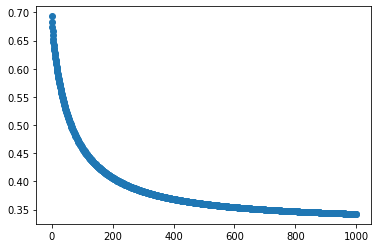

In [10]:
plt.plot(np.arange(len(cost)), cost, 'o-')

In [11]:
theta

array([[ 3.17391883],
       [ 3.48072558],
       [ 2.25055973],
       [-4.77406272],
       [-3.95332787],
       [-4.9485734 ],
       [-0.30318391],
       [-0.97995029],
       [-1.46864587],
       [ 0.97901249],
       [-3.29484088],
       [-1.47044259],
       [-2.10677048],
       [ 0.20971627],
       [-4.00652368],
       [-0.32391581],
       [-1.42279814],
       [-1.21796175],
       [ 0.3479095 ],
       [-0.70143208],
       [-0.57608389],
       [-1.73665677],
       [-1.06291324],
       [-1.24236153],
       [ 0.2516955 ],
       [-0.94182797],
       [ 0.32568251],
       [-3.14906141]])

## Visualize

In [12]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

In [13]:
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(map_feature(u[i:i+1], v[j:j+1]), theta)

In [14]:
z

array([[ -28.79058499,  -26.651193  ,  -24.77564238, ...,  -40.76341591,
         -45.8301319 ,  -51.6268698 ],
       [ -26.3396402 ,  -24.23963033,  -22.39881678, ...,  -37.39629022,
         -42.39852376,  -48.13214021],
       [ -24.21010211,  -22.14777331,  -20.34025047, ...,  -34.55500138,
         -39.50817354,  -45.19496377],
       ...,
       [ -53.77007828,  -51.83634688,  -50.15647777, ..., -138.31643631,
        -151.26562191, -165.76494866],
       [ -63.079291  ,  -61.07720447,  -59.33528765, ..., -151.10880169,
        -164.45585619, -179.38635888],
       [ -73.90499445,  -71.82683521,  -70.01566332, ..., -165.49372907,
        -179.25194642, -194.62769562]])

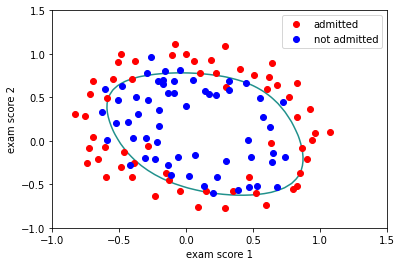

In [15]:
plt.plot(df[df['y']==0]['score1'], df[df['y']==0]['score2'], 'or')
plt.plot(df[df['y']==1]['score1'], df[df['y']==1]['score2'], 'ob')
plt.contour(u, v, z, 0)
plt.xlabel('exam score 1')
plt.ylabel('exam score 2')
plt.legend(['admitted', 'not admitted'])
plt.show()